## Falken-Klassifikation

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Northern_Goshawk_ad_M2.jpg/440px-Northern_Goshawk_ad_M2.jpg' width='150px;'/>

In diesem Projekt wollen wir Falkenklassifikation mit Hilfe von verschiedenen Kernel-Funktionen `'linear', 'poly', 'rbf', 'sigmoid'` eines Support-Vektor-Klassifikators beschreiben bzw. beobachten. Danach soll das beste SVC-Modell noch mit weiteren Klassifikatoren wie LogisticRegression, Naive Bayes und RandomForest verglichen werden.

## Daten einlesen und vorbereiten

Daten können aus folgender Adresse eingelesen werden:

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay


In [301]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Hawks.csv'

In [302]:
#Datei lesen und als DataFrame erhalten:
df = pd.read_csv(url)

Analyse und Vorbereitung der Daten:

In [303]:
df.head(3)

,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rownames      908 non-null    int64  
 1   Month         908 non-null    int64  
 2   Day           908 non-null    int64  
 3   Year          908 non-null    int64  
 4   CaptureTime   908 non-null    object 
 5   ReleaseTime   907 non-null    object 
 6   BandNumber    908 non-null    object 
 7   Species       908 non-null    object 
 8   Age           908 non-null    object 
 9   Sex           332 non-null    object 
 10  Wing          907 non-null    float64
 11  Weight        898 non-null    float64
 12  Culmen        901 non-null    float64
 13  Hallux        902 non-null    float64
 14  Tail          908 non-null    int64  
 15  StandardTail  571 non-null    float64
 16  Tarsus        75 non-null     float64
 17  WingPitFat    77 non-null     float64
 18  KeelFat       567 non-null    

In [305]:
#Überprüfen der Nan-Werten
df.isna().sum()

rownames          0
Month             0
Day               0
Year              0
CaptureTime       0
ReleaseTime       1
BandNumber        0
Species           0
Age               0
Sex             576
Wing              1
Weight           10
Culmen            7
Hallux            6
Tail              0
StandardTail    337
Tarsus          833
WingPitFat      831
KeelFat         341
Crop            343
dtype: int64

In [306]:
#Anzahl Zeilen und Spalten im Data Frame
df.shape

(908, 20)

In [307]:
# optional: aus dem bereinigten dataframe eine csv-datei erzeugen
df.to_csv('hawks.csv', index=False)

In [308]:
df.columns

Index(['rownames', 'Month', 'Day', 'Year', 'CaptureTime', 'ReleaseTime',
       'BandNumber', 'Species', 'Age', 'Sex', 'Wing', 'Weight', 'Culmen',
       'Hallux', 'Tail', 'StandardTail', 'Tarsus', 'WingPitFat', 'KeelFat',
       'Crop'],
      dtype='object')

In [309]:
# Umwandlung der Spalte 'Species' in numerische Werte
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [310]:
#Vorbereitung des DataFrames für die Erstellung von Correlation Matrix
#Dafür wurden nun nummerische Werte ausgewählt:
numerical_df = df.select_dtypes(include=[int, float])

# Berechnung der Korrelationsmatrix
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

              rownames     Month       Day      Year   Species      Wing  \
rownames      1.000000  0.096329 -0.024840  0.988010  0.075916 -0.185664   
Month         0.096329  1.000000 -0.477430  0.011741 -0.059401  0.147124   
Day          -0.024840 -0.477430  1.000000 -0.021216  0.018895  0.007826   
Year          0.988010  0.011741 -0.021216  1.000000  0.083774 -0.204111   
Species       0.075916 -0.059401  0.018895  0.083774  1.000000 -0.598102   
Wing         -0.185664  0.147124  0.007826 -0.204111 -0.598102  1.000000   
Weight       -0.153748  0.184230 -0.007902 -0.173998 -0.575732  0.934857   
Culmen       -0.156714  0.152329 -0.018937 -0.171621 -0.637203  0.957999   
Hallux       -0.129221 -0.004590 -0.007006 -0.129095 -0.298645  0.434528   
Tail         -0.182465  0.106533 -0.008900 -0.196719 -0.726804  0.900054   
StandardTail -0.044567  0.135331 -0.051325 -0.070422 -0.731422  0.883092   
Tarsus        0.245111  0.235709 -0.212159       NaN -0.569585  0.770739   
WingPitFat  

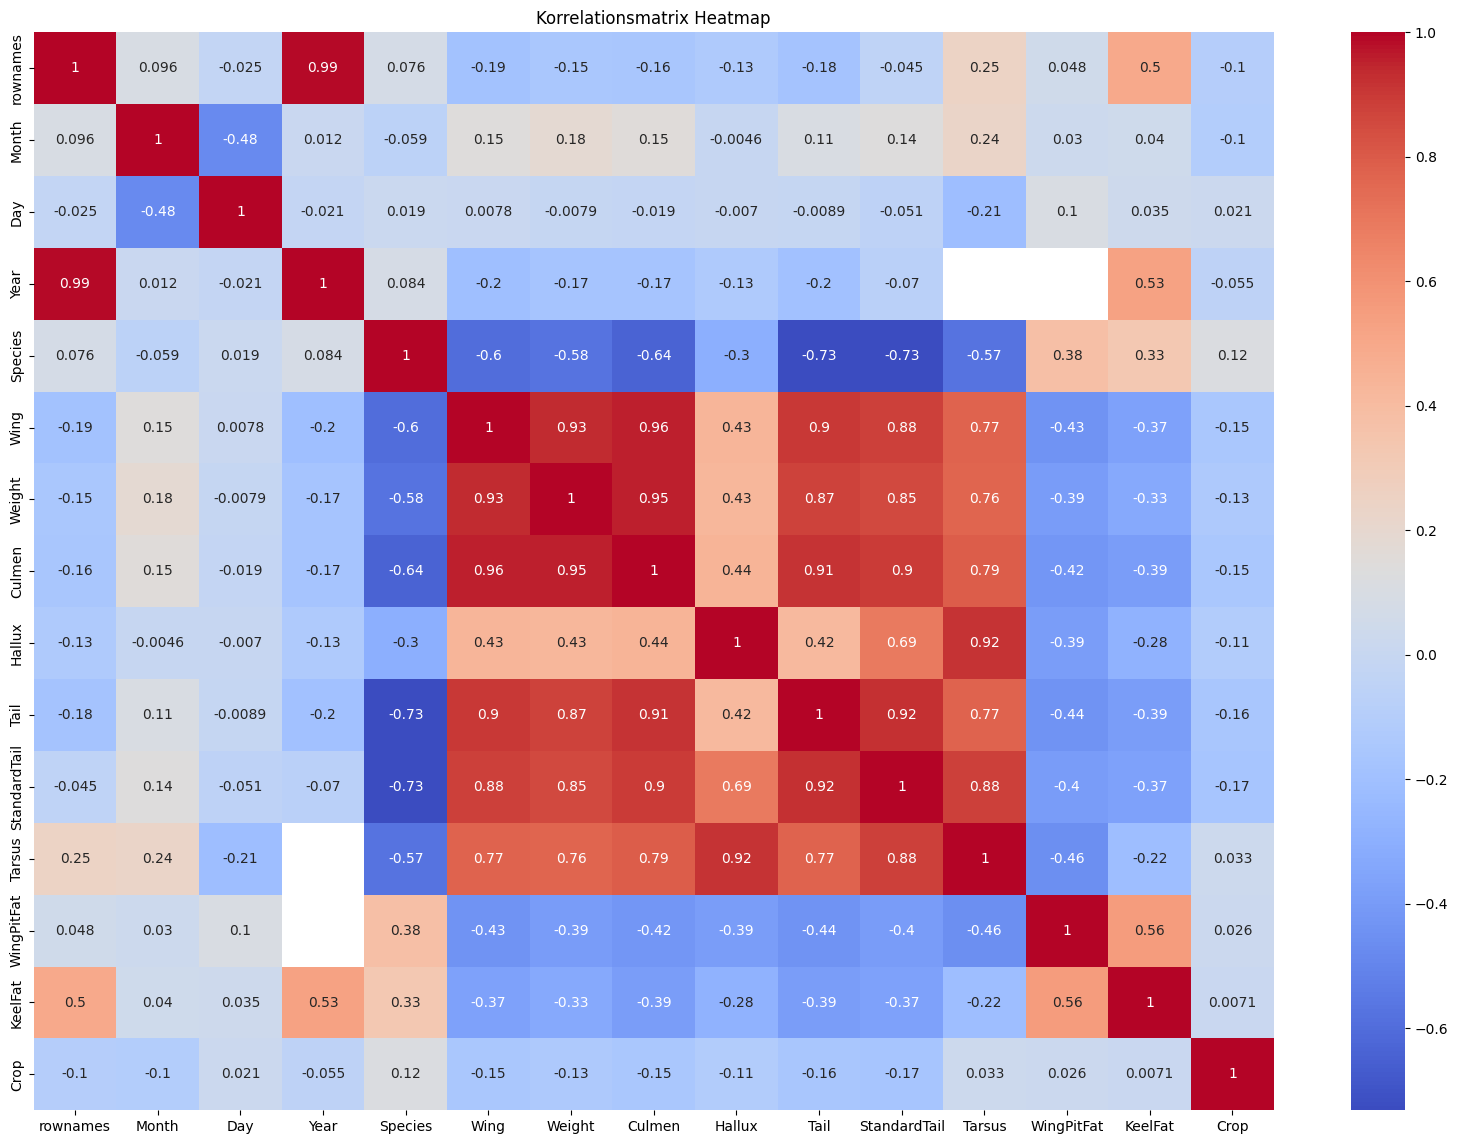

In [311]:
#Visualisierung der Korrelationmatrix

plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix Heatmap")
plt.show()

In [312]:
df_b=df.copy()

Als Target nehme Species.
Laut Correlationmatrix muss man Spalte von Wing bis KeelFat lassen, da sie höhe Correlation gezeigt haben. 

In [313]:
#Entferbnen nicht relevanten Spalten:
df_b.drop(columns=['Month', 'ReleaseTime', 'Day', 'Year', 'Tarsus', 'WingPitFat', 'Crop', 'CaptureTime', 'BandNumber', 'Age', 'Sex'], inplace=True)

In [314]:
df_b.head(2)

,rownames,Species,Wing,Weight,Culmen,Hallux,Tail,StandardTail,KeelFat
0,1,1,385.0,920.0,25.7,30.1,219,NaN,NaN
1,2,1,376.0,930.0,NaN,NaN,221,NaN,NaN


Nan-Werte behandeln:

In [315]:
missing_values = df_b.isnull().sum()#Nan Werte finden

# Entscheidung, wie mit den fehlenden Werten umgegangen werden soll
for column in df_b.columns:
    if df_b[column].dtype in ['float64', 'int64']:  # Für numerische Spalten
        if missing_values[column] > 0:
            if df_b[column].skew() > 1 or df_b[column].skew() < -1: # skew() überprüft: Wenn die Schiefe größer als 1 oder kleiner als -1 ist, gilt die Normalverteilung als stark schief
                #eine starke Schiefe
                print(f"Für die Spalte {column} wird Median verwendet.") 
            else:
                # keine starke Schiefe
                print(f"Für die Spalte {column} wird Mittelwert verwendet.")
    else:  # Für kategorische Spalten
        if missing_values[column] > 0:
            print(f"Spalte {column} wird mit Modus ersetzt.")

Für die Spalte Wing wird Mittelwert verwendet.
Für die Spalte Weight wird Mittelwert verwendet.
Für die Spalte Culmen wird Mittelwert verwendet.
Für die Spalte Hallux wird Median verwendet.
Für die Spalte StandardTail wird Mittelwert verwendet.
Für die Spalte KeelFat wird Mittelwert verwendet.


In [334]:
# Berechnen des Medians
median_value1 = df_b['Hallux'].median() 
df_b['Hallux'].fillna(median_value1, inplace=True) #Ersetzen Nan-Werte

C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_21624\3596948989.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_b['Hallux'].fillna(median_value1, inplace=True)


In [336]:
# Berechnen des Mittelwerts
mean_value = df_b['StandardTail'].mean() 
mean_value4 = df_b['KeelFat'].mean()
mean_value5 = df_b['Wing'].mean()
mean_value6 = df_b['Weight'].mean()
mean_value7 = df_b['Culmen'].mean()

In [337]:
#Ersetzen Nan-Werte
df_b['StandardTail'].fillna(mean_value, inplace=True)
df_b['KeelFat'].fillna(mean_value4, inplace=True)
df_b['Wing'].fillna(mean_value5, inplace=True)
df_b['Weight'].fillna(mean_value6, inplace=True)
df_b['Culmen'].fillna(mean_value7, inplace=True)

C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_21624\1292878332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_b['StandardTail'].fillna(mean_value, inplace=True)
C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_21624\1292878332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Auswahl und Skalierung der Test- und Trainingdaten zum Erstellung der Modellen: 

In [338]:
X = df_b.drop(columns=['Species'])  # Entfernen des Targets, X=Feautures
y = df_b['Species'] #Target
print(type(X)) 

<class 'pandas.core.frame.DataFrame'>


In [340]:
#Skalieren der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [341]:
#Erstellem der Training- und Testdaten (80 % - Training, 20 % für Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Erstellen der SCV Modells mit  verschiedenen Klassifikatoren: 

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_models = []# Liste für aller Arten von SVC
conf_matrices = {} #Liste fur ConfMatrix
class_reports = {} # Liste für Class_Reports

for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train) #trainieren
    y_pred = svc.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)# Berechnung der Genauigkeit 
    svc_models.append([kernel, accuracy])# Models und accuracy in die Liste hinzufügen
    
    #ConfusionMatrix und Classification report:
    conf_matrices[f"SVC ({kernel})"] = confusion_matrix(y_test, y_pred)
    class_reports[f"SVC ({kernel})"] = classification_report(y_test, y_pred)
    
result_df = pd.DataFrame(svc_models, columns=['Kernel', 'Genauigkeit'])
result_df_er = result_df.set_index(result_df.columns[0])# Spalte Model als Index einsetzen
result_df_er

,Genauigkeit
Kernel,
linear,0.978022
poly,0.928571
rbf,0.983516
sigmoid,0.967033


In [344]:
# Beste SVC-Modell auswählen
bestmodel=result_df.loc[result_df['Genauigkeit'].idxmax()]

print(f'Das beste SVC-Modell ist mit:\n{bestmodel}')


Das beste SVC-Modell ist mit:
Kernel              rbf
Genauigkeit    0.983516
Name: 2, dtype: object


In [345]:
#Logistische Regression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

conf_matrices["Logistic Regression"] = confusion_matrix(y_test, y_pred_logreg)
class_reports["Logistic Regression"]= classification_report(y_test, y_pred_logreg)



In [346]:
#Naive Bayes-Modell

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

conf_matrices["Naive Bayes"] = confusion_matrix(y_test, y_pred_nb)
class_reports["Naive Bayes"]= classification_report(y_test, y_pred_nb)


In [347]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

conf_matrices["Random Forest"] = confusion_matrix(y_test, y_pred_rf)
class_reports["Naive Bayes"]= classification_report(y_test, y_pred_rf)



In [350]:
# Auswertung aller Modelle
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Genauigkeit von Logistic Regression: {accuracy_logreg:.3f}")
print(f"Genauigkeit von Naive Bayes: {accuracy_nb:.3f}")
print(f"Genauigkeit von Random Forest: {accuracy_rf:.3f}")




Genauigkeit von Logistic Regression: 0.967
Genauigkeit von Naive Bayes: 0.967
Genauigkeit von Random Forest: 0.989


In [352]:
# Vergleich der Ergebnisse
print("\nVergleich der Modelle:")
print(f"SVC mit Kernel {bestmodel[0]}: {bestmodel[1]:.3f}")
print(f"Logistic Regression: {accuracy_logreg:.3f}")
print(f"Naive Bayes: {accuracy_nb:.3f}")
print(f"Random Forest: {accuracy_rf:.3f}")


Vergleich der Modelle:
SVC mit Kernel rbf: 0.984
Logistic Regression: 0.967
Naive Bayes: 0.967
Random Forest: 0.989


C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_21624\2583736940.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"SVC mit Kernel {bestmodel[0]}: {bestmodel[1]:.3f}")


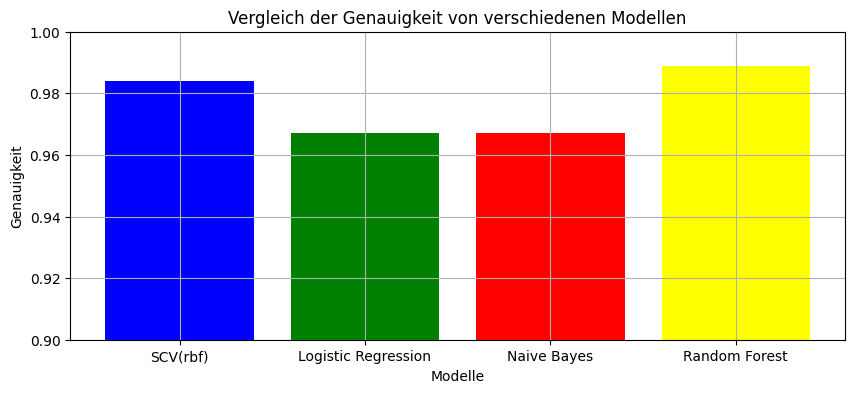

In [354]:
#Visualisierung:
data={'SCV(rbf)': 0.984, 'Logistic Regression' : 0.967, 'Naive Bayes' : 0.967, 'Random Forest': 0.989}
plt.figure(figsize=(10,4))
plt.bar(data.keys(), data.values(), color=['blue', 'green', 'red', 'yellow'])
plt.title('Vergleich der Genauigkeit von verschiedenen Modellen')
plt.xlabel("Modelle")
plt.ylabel("Genauigkeit")
plt.ylim(0.9, 1.0)  # Fokus auf den Unterschied
plt.grid()
plt.show()

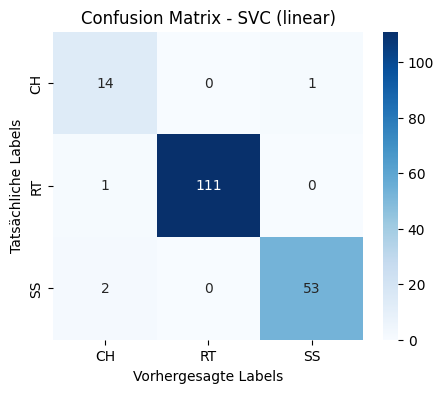

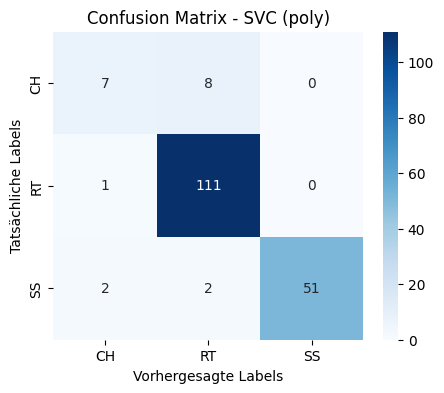

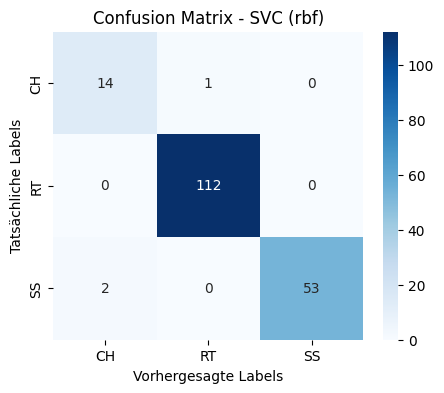

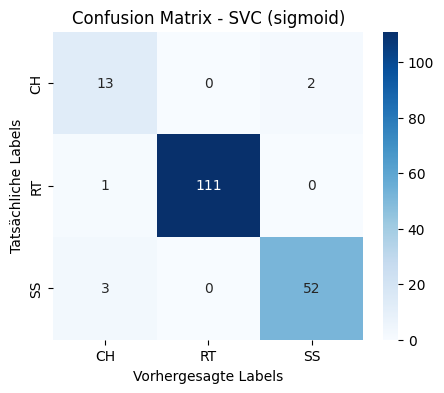

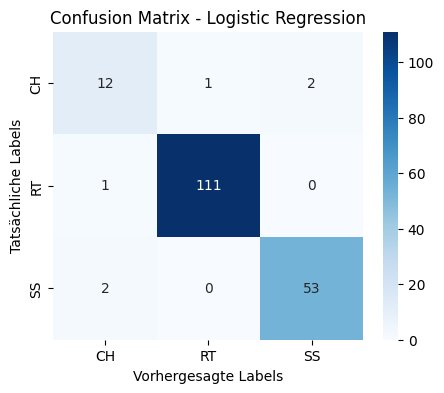

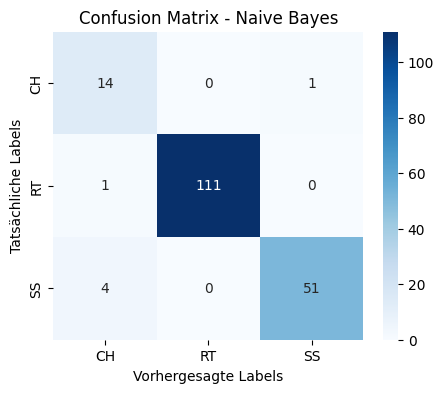

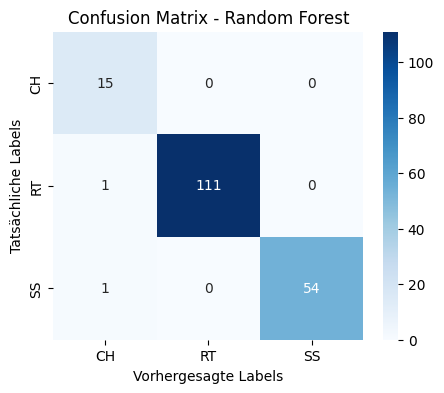

In [358]:
# Confusion Matrix visualisieren

def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Vorhergesagte Labels")
    plt.ylabel("Tatsächliche Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

for model, matrix in conf_matrices.items():
    plot_confusion_matrix(matrix, model)

In [332]:
for model, report in class_reports.items():
    print(f"Classification Report für {model}:\n")
    print(report)
    print("-" * 60)

Classification Report für SVC (linear):

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       1.00      0.99      1.00       112
           2       0.98      0.96      0.97        55

    accuracy                           0.98       182
   macro avg       0.94      0.96      0.95       182
weighted avg       0.98      0.98      0.98       182

------------------------------------------------------------
Classification Report für SVC (poly):

              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.92      0.99      0.95       112
           2       1.00      0.93      0.96        55

    accuracy                           0.93       182
   macro avg       0.87      0.80      0.83       182
weighted avg       0.92      0.93      0.92       182

------------------------------------------------------------
Classification Report für SVC (rbf):